In [ ]:
import pandas as pd
import numpy as np 
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score


#from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter


In [229]:
import warnings
warnings.filterwarnings('ignore')

In [230]:
df=pd.read_csv('C:/Python/MLCourse3 - Classification/Human_Activity_Recognition_Using_Smartphones_Data.csv')


In [231]:
X=df.iloc[:,:-1]
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [232]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(X)

,n_components,10
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [233]:
pca.explained_variance_

array([33.74640939,  2.58822943,  2.17910846,  0.98874018,  0.87368687,
        0.65176051,  0.64372457,  0.58365482,  0.52102614,  0.48110176])

In [238]:
pca.explained_variance_ratio_

array([0.62227069, 0.04772595, 0.04018191, 0.01823199, 0.01611045,
       0.01201821, 0.01187003, 0.01076237, 0.00960752, 0.00887133])

In [259]:
from itertools import accumulate
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

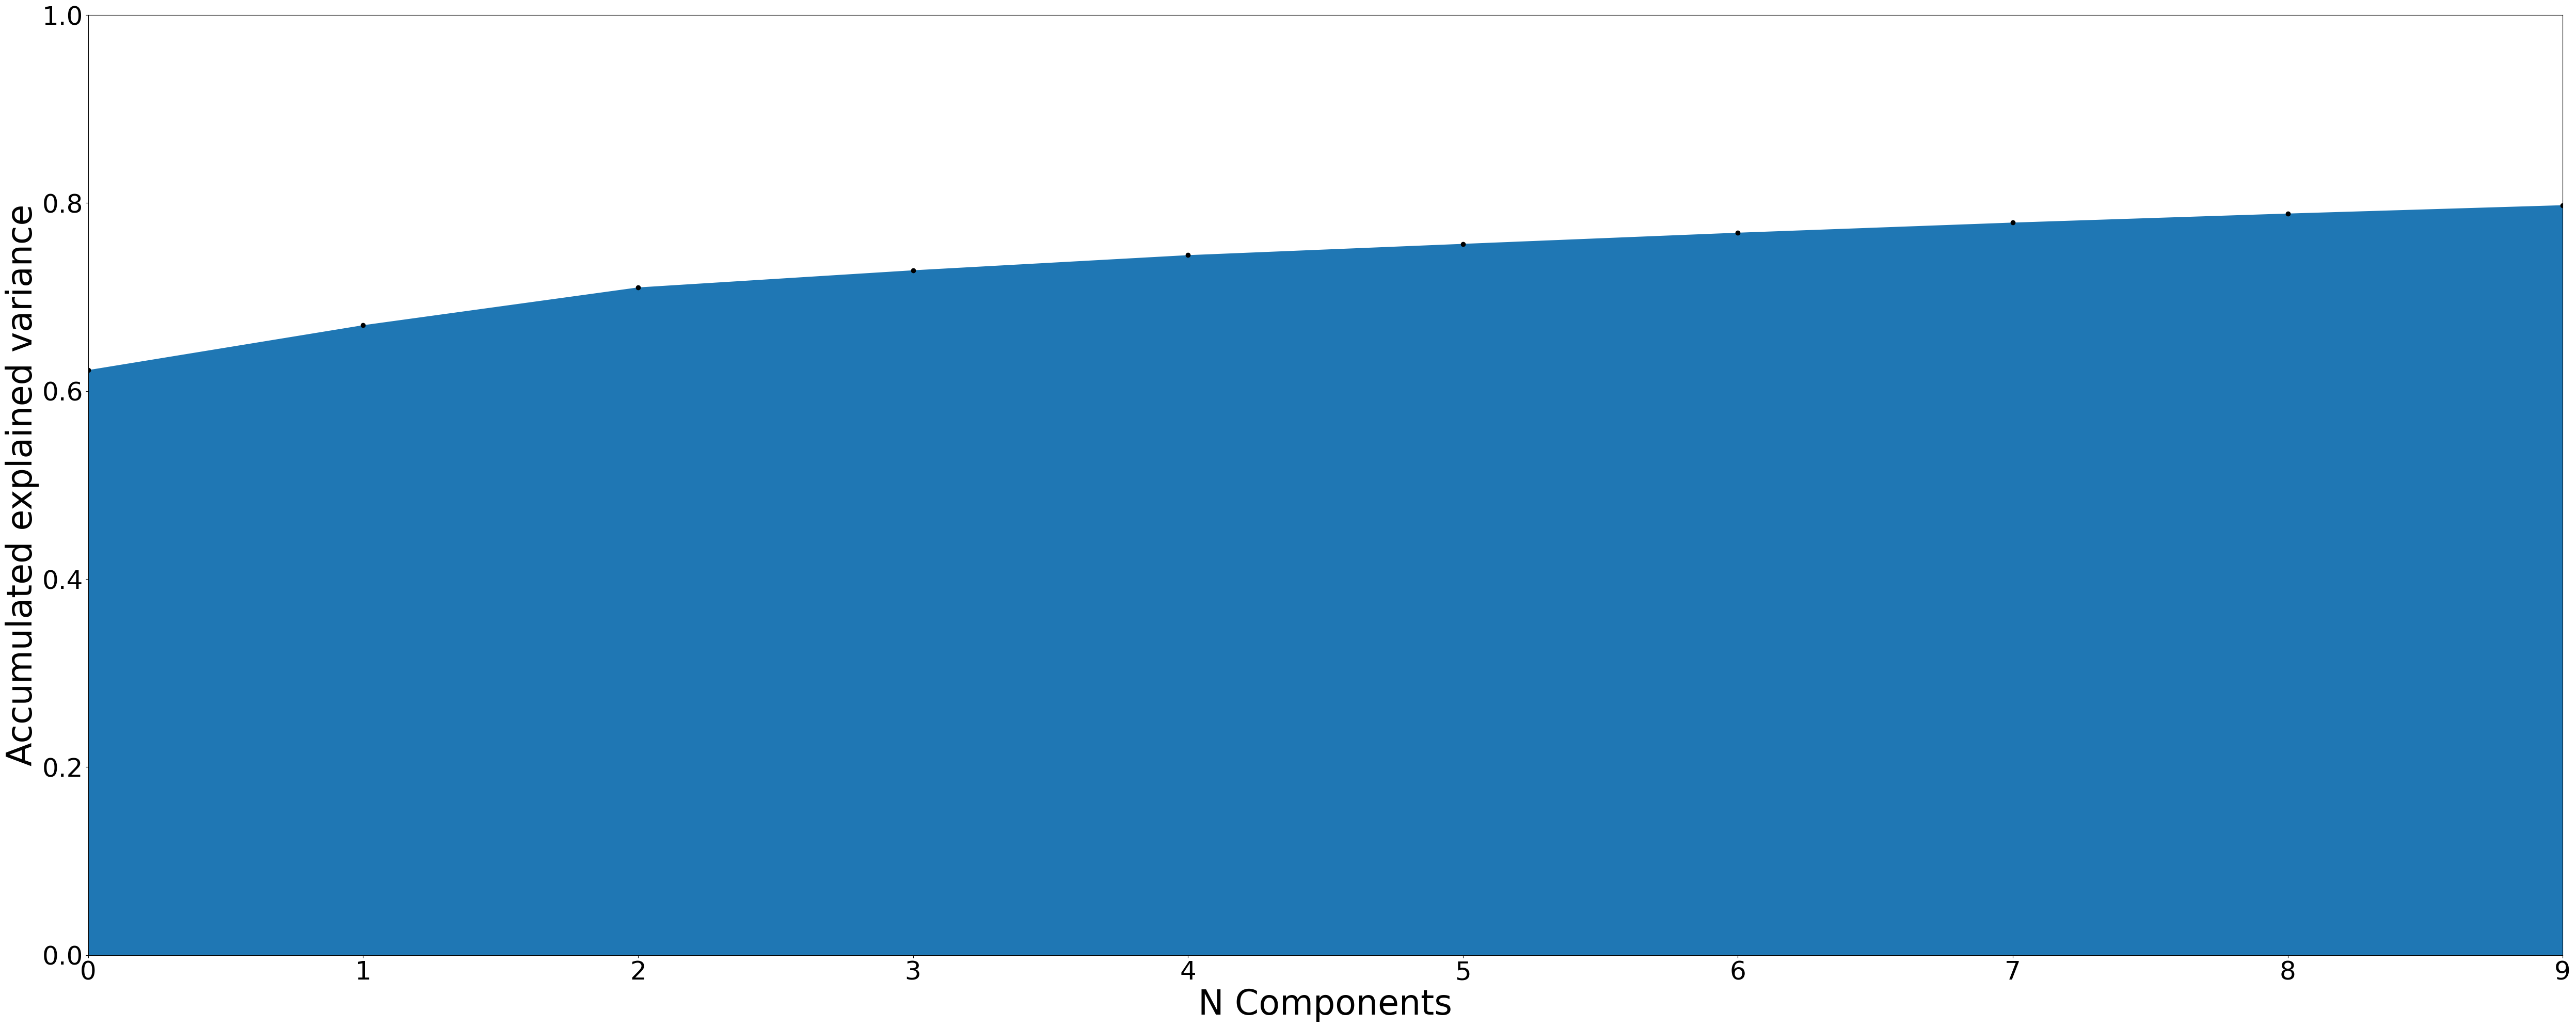

In [260]:
plot_explained_variance(pca)

In [261]:
X_hat=pca.transform(X)

In [262]:
X_hat=pd.DataFrame(X_hat)
X_hat

,0,1,2,3,4,5,6,7,8,9
0,-5.537858,0.716345,1.412546,-1.733302,-0.920246,0.467883,-0.196259,0.845865,-1.324194,0.181811
1,-5.564174,0.579506,1.827912,-0.796021,-0.626565,-0.991651,-0.065073,-0.758446,-0.944750,-0.570210
2,-5.499319,0.297684,2.148152,-0.604225,-0.005493,0.026151,-0.018304,0.084837,-0.219448,-0.216676
3,-5.700396,-0.354586,2.149211,-0.328516,-0.791819,-0.898207,-0.690719,-0.469168,0.390371,0.247483
4,-5.769082,-0.559389,2.365302,-0.333767,-0.448452,-0.328038,-0.252560,-0.044749,0.424875,0.254294
...,...,...,...,...,...,...,...,...,...,...
10294,4.427804,1.436294,-0.540430,0.655466,0.876412,-0.045611,-0.186602,-0.040852,1.414535,0.626177
10295,5.003146,0.947679,-0.358492,0.376804,1.084618,-0.097103,0.257041,-0.365448,0.189482,-0.500727
10296,4.536584,0.994006,-0.479970,0.188002,0.594221,-0.126399,-0.283550,0.291437,0.519167,0.702229
10297,3.744576,1.276951,-0.367379,0.404793,0.839354,-0.051404,-0.895875,0.099919,1.012612,1.049927


In [263]:
clusters=2

In [264]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=clusters)

In [265]:
df['kmeans']=km.fit_predict(X_hat)

In [268]:
Kresult=df[['Activity','kmeans']].groupby(['kmeans','Activity']).size().to_frame().rename(columns={0:'number'})

In [273]:
Kresult

number
kmeans Activity                  
0      LAYING                1932
       SITTING               1774
       STANDING              1906
1      LAYING                  12
       SITTING                  3
       WALKING               1722
       WALKING_DOWNSTAIRS    1406
       WALKING_UPSTAIRS      1544

In [188]:
km_list = list()

for clust in range(2,11):
    km = KMeans(n_clusters=clust)
    km = km.fit(df[floatcolumns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

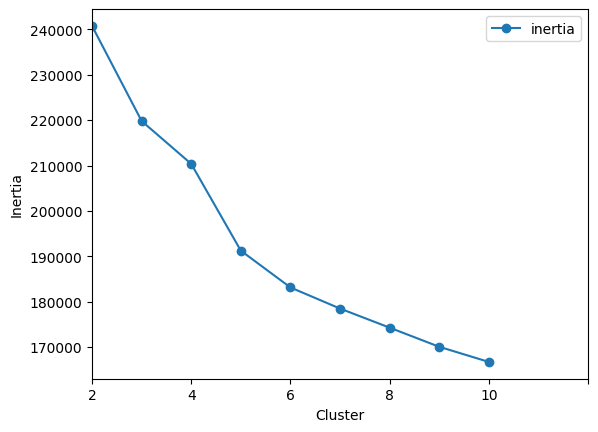

In [12]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,11,2))
ax.set_xlim(0,10)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [275]:
from sklearn.cluster import AgglomerativeClustering

In [276]:
ag=AgglomerativeClustering(n_clusters=clusters, metric='euclidean',linkage='ward')

In [277]:
df['AggClust']=ag.fit_predict(X_hat)

MemoryError: Unable to allocate 405. MiB for an array with shape (53029551,) and data type float64

In [203]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,kmeans,AggClust,GMM
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING,0,1,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING,0,1,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING,0,1,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING,0,1,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS,1,0,0
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS,1,0,0
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS,1,0,0
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS,1,0,0


In [204]:
(df[['Activity','AggClust','kmeans']]
 .groupby(['AggClust','Activity'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
AggClust Activity                  
0        LAYING                  12
         SITTING                  2
         STANDING                 1
         WALKING               1722
         WALKING_DOWNSTAIRS    1406
         WALKING_UPSTAIRS      1544
1        LAYING                1932
         SITTING               1775
         STANDING              1905

In [278]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=clusters,n_init=10)
GMM.fit(X_hat)

,n_components,2
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


In [279]:
df['GMM']=GMM.predict(X_hat)

In [280]:
(df[['Activity','GMM']]
 .groupby(['GMM','Activity'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
GMM Activity                  
0   LAYING                   6
    SITTING                  4
    STANDING                 5
    WALKING               1722
    WALKING_DOWNSTAIRS    1406
    WALKING_UPSTAIRS      1544
1   LAYING                1938
    SITTING               1773
    STANDING              1901

In [108]:
X_hat[1]

0        0.716345
1        0.579506
2        0.297684
3       -0.354586
4       -0.559389
           ...   
10294    1.436294
10295    0.947679
10296    0.994006
10297    1.276951
10298    1.048846
Name: 1, Length: 10299, dtype: float64

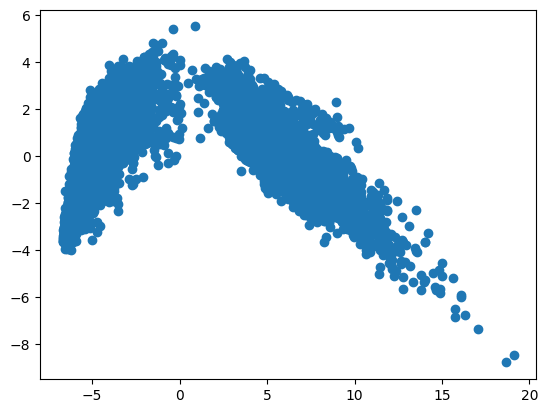

In [176]:
plt.scatter(X_hat[0],X_hat[1])

In [226]:
def display_cluster(X,km=[],num_clusters=0,shift=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    for i in range(num_clusters):
        plt.scatter(X.loc[km.labels_==i,0+shift],X.loc[km.labels_==i,1+shift],c = color[i],alpha = alpha,s=s)
        plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [112]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], shape=(10299,), dtype=int32)

In [121]:
X_hat.loc[km.labels_==1,0]

66       1.057570
67       1.457732
70       4.631008
71       3.899281
78       6.019486
           ...   
10294    4.427804
10295    5.003146
10296    4.536584
10297    3.744576
10298    3.969318
Name: 0, Length: 4687, dtype: float64

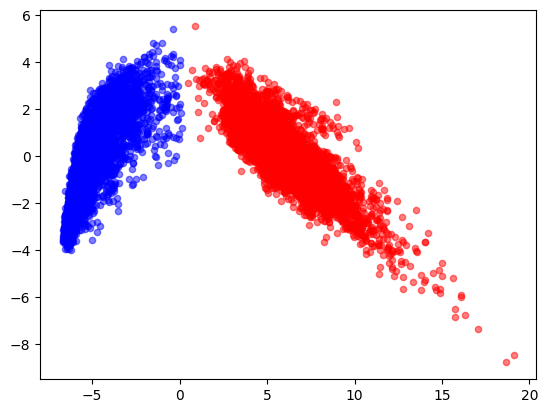

In [227]:
display_cluster(X_hat,km,2,0)

In [157]:
X1shift=X_hat.iloc[:,1:]
X1shift.iloc[1,:]

1    0.579506
2    1.827912
3   -0.796021
4   -0.626565
5   -0.991651
6   -0.065073
7   -0.758446
8   -0.944750
9   -0.570210
Name: 1, dtype: float64